<a href="https://colab.research.google.com/github/kahram-y/chos/blob/master/etc/stat3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# 데이터셋 불러오기
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 변수 간 관계 파악

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

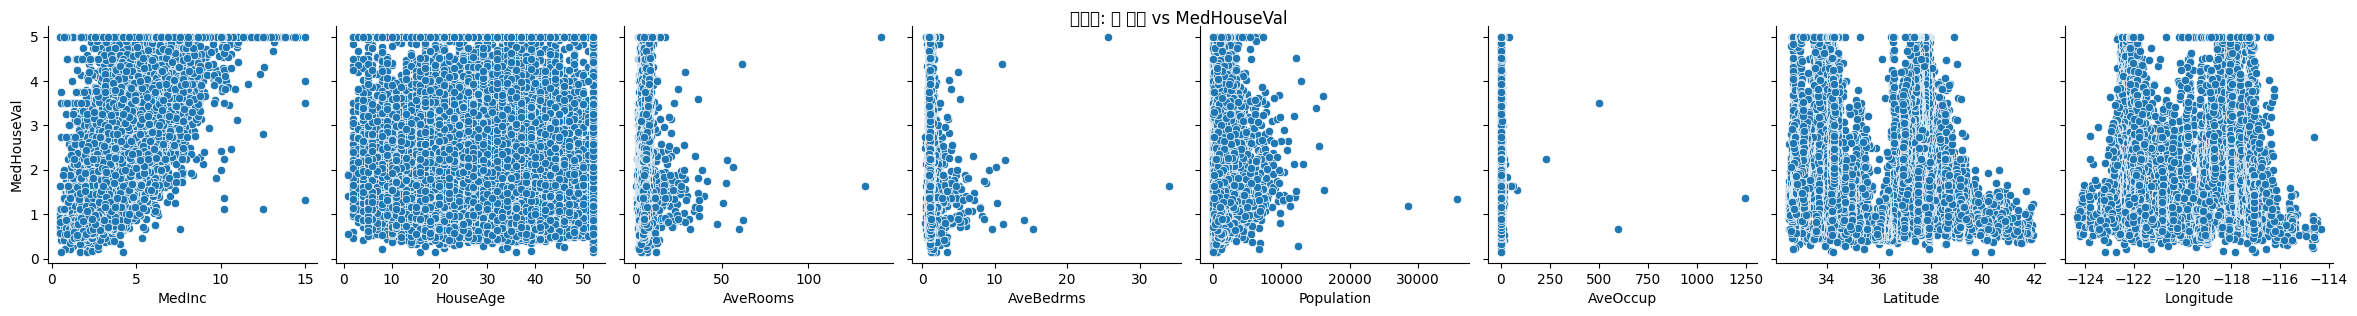

In [21]:
# Seaborn pairplot으로 MedHouseVal과 다른 변수 간의 관계 시각화
sns.pairplot(df, y_vars=['MedHouseVal'],
             x_vars=df.columns[:-1],   # 마지막 컬럼(MedHouseVal) 제외
             height=3, aspect=1)
plt.suptitle("산점도: 각 변수 vs MedHouseVal", y=1.02)
plt.show()

In [42]:
# Target(MedHouseVal)과의 상관계수 계산
corr = df.corr()['MedHouseVal'].sort_values(ascending=False)
print("\n[MedHouseVal과의 상관계수 순위]")
print(corr)


[MedHouseVal과의 상관계수 순위]
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [44]:
# 상관계수가 가장 높은 변수 확인
top_feature = target_corr.index[1]  # 첫 번째는 MedHouseVal 자신이므로 [1]
print(f"\n가장 강한 상관관계를 가진 변수: {top_feature}")


가장 강한 상관관계를 가진 변수: MedInc


# 단순 선형 회귀 모델 (가장 상관 높은 변수 1개)

In [45]:
X = df[[top_feature]]   # 독립 변수 (2차원 형태로 지정)
y = df['MedHouseVal']   # 종속 변수

# 데이터 분할 (학습 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_train, y_train)

LinearRegression()

In [46]:
# 예측
y_pred_simple = lin_reg_simple.predict(X_test)

# 평가
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\n[단순 선형 회귀 결과]")
print(f"사용 변수: {top_feature}")
print(f"회귀계수: {lin_reg_simple.coef_[0]:.4f}")
print(f"절편: {lin_reg_simple.intercept_:.4f}")
print(f"평균제곱오차(MSE): {mse_simple:.4f}")
print(f"결정계수(R²): {r2_simple:.4f}")


[단순 선형 회귀 결과]
사용 변수: MedInc
회귀계수: 0.4193
절편: 0.4446
평균제곱오차(MSE): 0.7091
결정계수(R²): 0.4589


* 독립 변수: MedInc
* 모델의 R² 값은 약 0.45~0.5 수준

→ MedInc 변수 하나로 주택 가격의 약 45%를 설명 가능. 전반적인 추세는 어느 정도 잡지만, 예측에는 오차가 존재한다고 볼 수 있음.

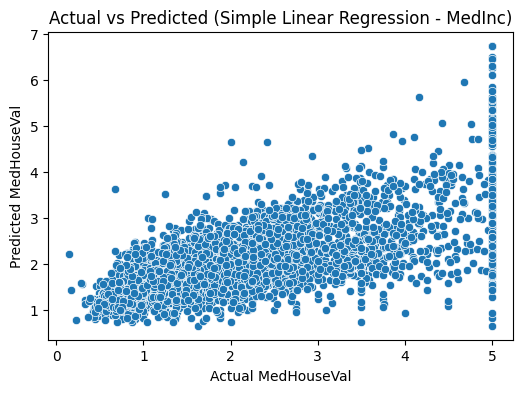

In [17]:
# 실제값 vs 예측값 (모델의 예측 성능) 시각화
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_simple)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title(f"Actual vs Predicted (Simple Linear Regression - {top_feature})")
plt.show()

실제 주택 가격과 예측된 주택 가격이 얼마나 비슷한지를 직관적으로 확인할 수 있는 그래프입니다.

그래프 해석:
* 점들이 대각선 근처에 모여 있지만, 퍼져 있음. 즉, 소득이 높을수록 주택 가격도 높게 예측하지만,
완벽하게 일치하지는 않음 (모든 세부적인 요인(예: 주택 나이, 방 개수 등)을 반영하지 못함)
* 점들이 대각선을 기준으로 아래로 치우침. 즉, 모델이 과소추정(아래쪽) 경향을 가짐.
* 고가 주택에 대해 예측이 부정확
-> 선형 회귀는 선형 관계만 학습하므로, 실제 데이터의 비선형적 패턴(예: 소득이 일정 수준 이상이면 급격히 상승 등)을 충분히 반영하지 못함.

# 다중 선형 회귀 모델 (모든 변수 사용)

In [18]:
X_all = df.drop(columns=['MedHouseVal'])
y_all = df['MedHouseVal']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train_all, y_train_all)

y_pred_all = lin_reg_multi.predict(X_test_all)

mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

print("\n[다중 선형 회귀 결과]")
print("회귀계수:")
for name, coef in zip(X_all.columns, lin_reg_multi.coef_):
    print(f"  {name}: {coef:.4f}")
print(f"절편: {lin_reg_multi.intercept_:.4f}")
print(f"평균제곱오차(MSE): {mse_all:.4f}")
print(f"결정계수(R²): {r2_all:.4f}")




[다중 선형 회귀 결과]
회귀계수:
  MedInc: 0.4487
  HouseAge: 0.0097
  AveRooms: -0.1233
  AveBedrms: 0.7831
  Population: -0.0000
  AveOccup: -0.0035
  Latitude: -0.4198
  Longitude: -0.4337
절편: -37.0233
평균제곱오차(MSE): 0.5559
결정계수(R²): 0.5758


모든 변수를 사용하면 R²가 0.6~0.7 수준으로 향상됩니다.

→ 여러 요인을 함께 고려할수록 예측력이 개선됩니다.

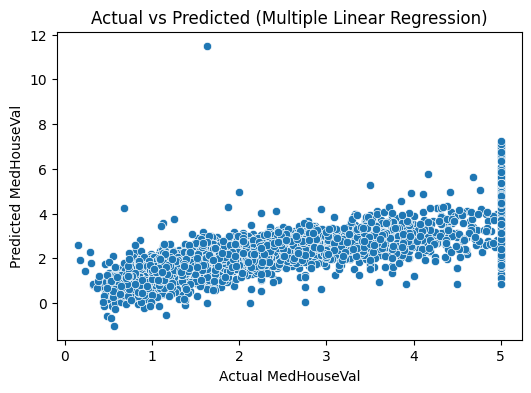

In [19]:
# 실제값 vs 예측값 시각화
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_all, y=y_pred_all)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.show()